Step 1: Import Required Libraries

In [5]:
import pandas as pd  # For data handling
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For statistical plots
import warnings  # To suppress warnings

In [6]:
# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Step 2: Load Clustered Dataset

In [7]:
# Define file path for cluster results
file_path = "../results/cluster_assignments.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster
0,0,3536,3918,-0.016289,708,-0.021301,1.725758,36,0
1,0,2794,3926,-0.016289,708,-0.012620,1.725758,36,0
2,0,3044,913,-0.007118,708,-0.019234,1.725758,36,0
3,0,2985,1910,-0.016289,708,-0.012620,1.725758,36,0
4,0,2984,2911,-0.016289,708,-0.012620,1.725758,36,0


Step 3: Visualizing Cluster Distributions

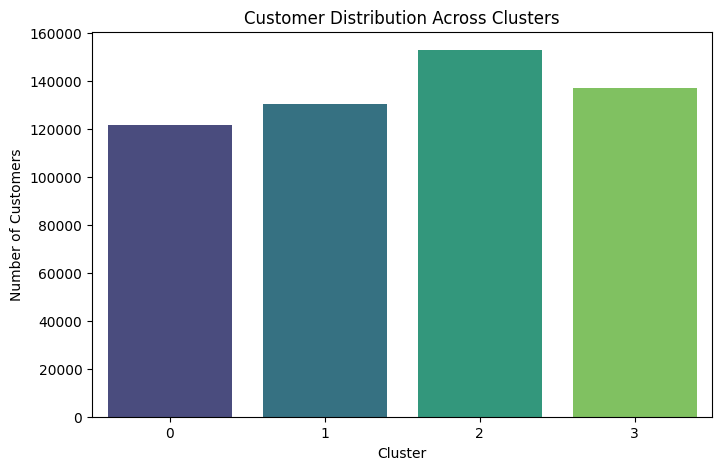

In [8]:
# Count of customers in each cluster
plt.figure(figsize=(8, 5))
sns.countplot(x="Cluster", data=df, palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution Across Clusters")
plt.show()

Step 4: Feature Analysis Across Clusters

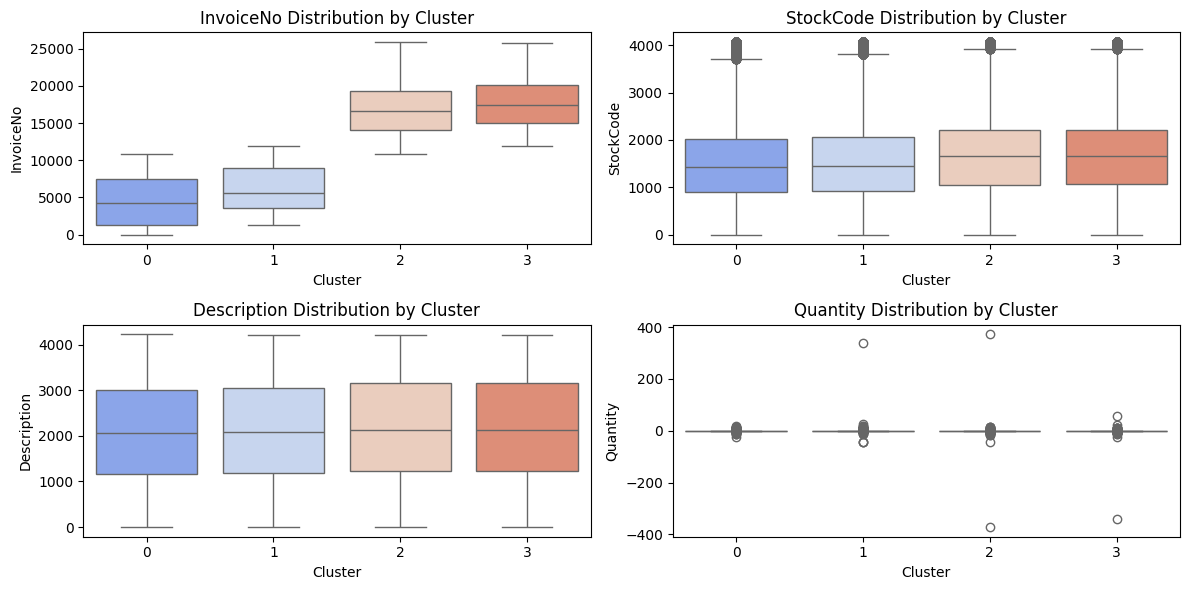

In [9]:
# Choose key numerical features for comparison
num_features = df.select_dtypes(include=[np.number]).columns.drop("Cluster")

# Create boxplots to show feature distribution across clusters
plt.figure(figsize=(12, 6))

for i, feature in enumerate(num_features[:4]):  # Limit to 4 features for readability
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x="Cluster", y=feature, data=df, palette="coolwarm")
    plt.title(f"{feature} Distribution by Cluster")

plt.tight_layout()
plt.show()

Step 5: Scatter Plot for Clusters

c:\Users\kauti\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


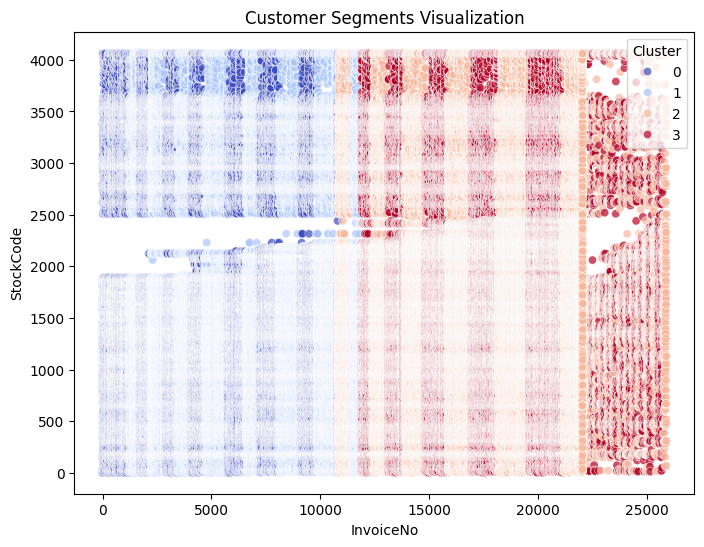

In [10]:
# Select first two numerical features for visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[num_features[0]], y=df[num_features[1]], hue=df["Cluster"], palette="coolwarm", alpha=0.7)
plt.xlabel(num_features[0])
plt.ylabel(num_features[1])
plt.title("Customer Segments Visualization")
plt.legend(title="Cluster")
plt.show()

Step 6: Cluster Profiling (Summarizing Key Insights)

In [11]:
# Compute mean values for each cluster
cluster_summary = df.groupby("Cluster").mean()

# Display summary
print("\nCluster Profiles:\n")
print(cluster_summary)

# Save the summary as a report
cluster_summary.to_csv("../reports/customer_segmentation_report.csv")


Cluster Profiles:

            InvoiceNo    StockCode  Description  Quantity   InvoiceDate  \
Cluster                                                                   
0         4445.926841  1583.875208  2098.685888 -0.000337   5714.536904   
1         6283.132241  1594.158131  2123.197955  0.004567  16551.219438   
2        16878.879128  1700.095221  2153.497818 -0.000005   6149.771651   
3        17309.784304  1708.665303  2159.529778 -0.004042  18424.251703   

         UnitPrice  CustomerID    Country  
Cluster                                    
0        -0.004592    0.004586  34.378672  
1        -0.005701   -0.005097  34.249168  
2         0.007944   -0.000534  34.242882  
3         0.000641    0.001382  34.183284  
